# Canine Inteligence and Size

This dataset was found on Kaggle (https://www.kaggle.com/datasets/thedevastator/canine-intelligence-and-size) and the first goal is to perform an Exploratory Data Analysis to understand this data.

### Data Extraction from Kaggle

In [89]:
# !kaggle datasets download -d thedevastator/canine-intelligence-and-size

In [90]:
# import zipfile

In [91]:
# with zipfile.ZipFile('canine-intelligence-and-size.zip', 'r') as zip_ref:
#     zip_ref.extractall()

This dataset is composed by two files:  

**AKC Breed Info.csv**: contains data on the height and weight of each breed  
**dog_inteligence.csv**: contains data on the breed's classification on obedience and maximum and minimum number of tries to make a dog obey a certain command

### Exploratory Analysis

In [92]:
import pandas as pd
import matplotlib.pyplot as plt

In [93]:
breed_info = pd.read_csv('AKC Breed Info.csv')
breed_info.head()

,index,Breed,height_low_inches,height_high_inches,weight_low_lbs,weight_high_lbs
0,0,Akita,26,28,80,120
1,1,Anatolian Sheepdog,27,29,100,150
2,2,Bernese Mountain Dog,23,27,85,110
3,3,Bloodhound,24,26,80,120
4,4,Borzoi,26,28,70,100


In [94]:
dog_info = pd.read_csv('dog_intelligence.csv')
dog_info.head()

,index,Breed,Classification,obey,reps_lower,reps_upper
0,0,Border Collie,Brightest Dogs,95%,1,4
1,1,Poodle,Brightest Dogs,95%,1,4
2,2,German Shepherd,Brightest Dogs,95%,1,4
3,3,Golden Retriever,Brightest Dogs,95%,1,4
4,4,Doberman Pinscher,Brightest Dogs,95%,1,4


Since both files are mergeable by breed and contain relevant information, I'll merge them and from now on I will perform the analysis with just one data set. I will also drop the index columns (index_x and index_y) as they become irrelevant after the merge.

In [95]:
whole_info = dog_info.merge(breed_info, on='Breed')
whole_info.drop(['index_x','index_y'], axis=1, inplace=True)

In [96]:
whole_info.isna().sum()

Breed                 0
Classification        0
obey                  9
reps_lower            0
reps_upper            0
height_low_inches     0
height_high_inches    0
weight_low_lbs        0
weight_high_lbs       0
dtype: int64

We have some missing lines on Obey, let's see what info do we have on these.

In [97]:
whole_info[whole_info['obey'].isna()]

,Breed,Classification,obey,reps_lower,reps_upper,height_low_inches,height_high_inches,weight_low_lbs,weight_high_lbs
96,Shih Tzu,Lowest Degree of Working/Obedience Intelligence,NaN,81,100,8,11,9,16
97,Basset Hound,Lowest Degree of Working/Obedience Intelligence,NaN,81,100,14,14,40,50
98,Mastiff,Lowest Degree of Working/Obedience Intelligence,NaN,81,100,27,30,175,190
99,Beagle,Lowest Degree of Working/Obedience Intelligence,NaN,81,100,13,16,18,30
100,Bloodhound,Lowest Degree of Working/Obedience Intelligence,NaN,81,100,24,26,80,120
101,Borzoi,Lowest Degree of Working/Obedience Intelligence,NaN,81,100,26,28,70,100
102,Chow Chow,Lowest Degree of Working/Obedience Intelligence,NaN,81,100,19,22,45,55
103,Basenji,Lowest Degree of Working/Obedience Intelligence,NaN,81,100,17,17,20,22
104,Afghan Hound,Lowest Degree of Working/Obedience Intelligence,NaN,81,100,25,27,50,60


I wonder if the values on Classification were automatically atributed by the lack of Obey score, but we don't have information on this. Let's deal with the missing Obey values later.

Do we have a single line per breed or can a brred have multiple lines?

In [98]:
whole_info['Breed'].value_counts().sort_values(ascending=False)

Border Collie         1
Golden Retriever      1
Doberman Pinscher     1
Labrador Retriever    1
Papillon              1
                     ..
Bloodhound            1
Borzoi                1
Chow Chow             1
Basenji               1
Afghan Hound          1
Name: Breed, Length: 105, dtype: int64

How many breeds are present in the dataset?

In [99]:
whole_info['Breed'].count()

105

And which classifications were attributed?

In [100]:
whole_info['Classification'].unique()

array(['Brightest Dogs', 'Excellent Working Dogs',
       'Above Average Working Dogs',
       'Average Working/Obedience Intelligence',
       'Fair Working/Obedience Intelligence',
       'Lowest Degree of Working/Obedience Intelligence '], dtype=object)

The obey category is coded as a string but I might want to plot the values so I need to convert this to an integer or float. Since there are some NA's on the column, let's first separate the dataframe into two, one with the breeds which have a value of obey assigned and those who do not. 

In [101]:
whole_info_na_obey = whole_info[whole_info['obey'].isna()]
whole_info_obey = whole_info[~whole_info['obey'].isna()]

In [102]:
whole_info_obey['obey_perc'] = whole_info_obey['obey'].apply(lambda x: float(x.replace('%',''))/100)

C:\Users\Hugo\AppData\Local\Temp\ipykernel_15024\2544394186.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  whole_info_obey['obey_perc'] = whole_info_obey['obey'].apply(lambda x: float(x.replace('%',''))/100)


How many breeds had no information on obey?

In [103]:
whole_info_na_obey['Breed'].count()

9

Since there are not many breeds wihtout information, we leave them out of the analysis for now.

What is the distribution of the **obey** values?

In [104]:
whole_info_obey['obey_perc'].unique()

array([0.95, 0.85, 0.7 , 0.5 , 0.3 ])

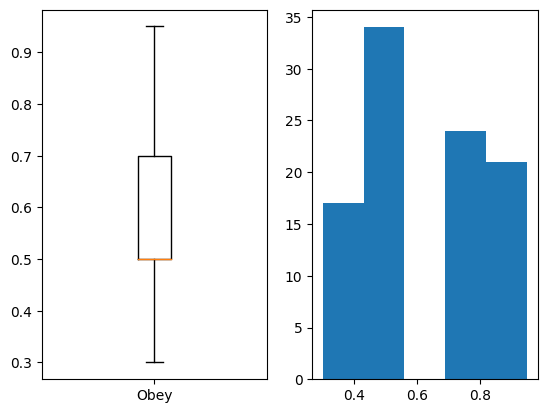

In [105]:
fig, ax = plt.subplots(1,2)
ax[0].boxplot(whole_info_obey['obey_perc'])
ax[0].set_xticklabels(['Obey'])
ax[1].hist(x=whole_info_obey['obey_perc'], bins=5)
plt.show()

This is a very odd distribution because it feels like these values are not continuous, like there was a discrete scale of evaluation. However, there's no information pointing towards this.

How many breeds fall under each classification?

In [106]:
whole_info_obey['Classification'].value_counts().sort_values(ascending=False)

Average Working/Obedience Intelligence    34
Above Average Working Dogs                24
Fair Working/Obedience Intelligence       17
Excellent Working Dogs                    14
Brightest Dogs                             7
Name: Classification, dtype: int64

The classification is very dubious as there is no clear scale (which one is higher Fair or Average?). Let's see if the obey value gives any insight on this. Let's see, for each classification which is the maximum and minimum of the obey column.

In [107]:
whole_info_obey.groupby(['Classification'])['obey_perc'].agg(['min','max'])

,min,max
Classification,,
Above Average Working Dogs,0.70,0.70
Average Working/Obedience Intelligence,0.50,0.50
Brightest Dogs,0.95,0.95
Excellent Working Dogs,0.85,0.85
Fair Working/Obedience Intelligence,0.30,0.30


So the Classification is no attributed along a range, but it is tied to the value attributed to the Obey score, being Fair Working/Obedience Intelligence the lowest classification possible with an Obey score attributed.

Let's see how the Number of Reps is distributed by Classification. For that we will need the range of reps for each Classification.

In [108]:
whole_info_obey['reps_range'] = whole_info_obey['reps_upper'] - whole_info_obey['reps_lower']

C:\Users\Hugo\AppData\Local\Temp\ipykernel_15024\3130644685.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  whole_info_obey['reps_range'] = whole_info_obey['reps_upper'] - whole_info_obey['reps_lower']


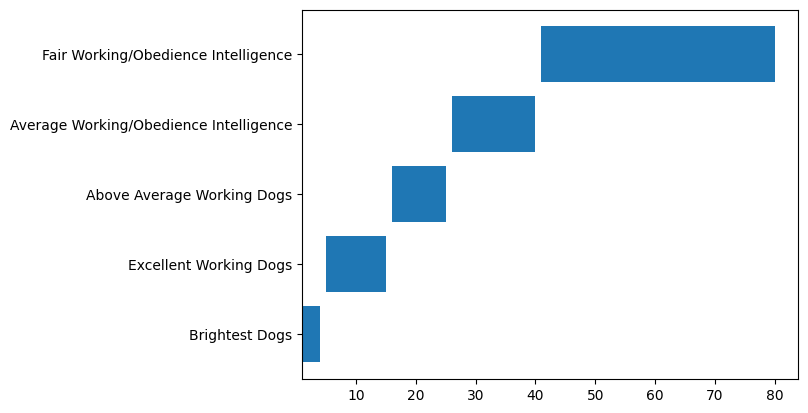

In [109]:
fig, ax = plt.subplots()
ax.barh(y=whole_info_obey['Classification'], width=whole_info_obey['reps_range'], left=whole_info_obey['reps_lower'])
plt.show()

They don't overlap, so the classification seems to be based on a certain range on the Obey score.

Let's try to see if there is some correlation between the average height and weight of the Breed and the Classification. For that's let's calculate both of the averages and the create a scatter plot with both, colored by Classification.

In [110]:
try:
    whole_info_obey.loc[:,'avg_height'] = (whole_info_obey['height_high_inches'].astype(float) + whole_info_obey['height_high_inches'].astype(float))/2
    whole_info_obey.loc[:,'avg_weight'] = (whole_info_obey['weight_high_lbs'].astype(float) + whole_info_obey['weight_low_lbs'].astype(float))/2
except Exception as e:
    print(e)


could not convert string to float: 'na'


In [111]:
whole_info_obey[(whole_info_obey['height_high_inches']=='na')]

,Breed,Classification,obey,reps_lower,reps_upper,height_low_inches,height_high_inches,weight_low_lbs,weight_high_lbs,obey_perc,reps_range
70,Alaskan Malamute,Average Working/Obedience Intelligence,50%,26,40,na,na,na,na,0.5,14


Seems like we have a problem here. The info for the Alaskan Malamute is coded as 'na' which is not a null but also not very useful. Let's drop that line from this analysis and try again

In [112]:
whole_info_obey = whole_info_obey[~(whole_info_obey['Breed']=='Alaskan Malamute')]

In [113]:
whole_info_obey.loc[:,'avg_height'] = (whole_info_obey['height_high_inches'].astype(float) + whole_info_obey['height_high_inches'].astype(float))/2
whole_info_obey.loc[:,'avg_weight'] = (whole_info_obey['weight_high_lbs'].astype(float) + whole_info_obey['weight_low_lbs'].astype(float))/2

Seems Perfect! Since the Alaskan Malamute had no usable values for height and weight we can drop the line as a whole since it won't be necessary for the rest of the analysis.
Let's check the scatter plot then. 

In [114]:
whole_info_obey['Classification'].unique()

array(['Brightest Dogs', 'Excellent Working Dogs',
       'Above Average Working Dogs',
       'Average Working/Obedience Intelligence',
       'Fair Working/Obedience Intelligence'], dtype=object)

In [115]:
color_dict = {'Brightest Dogs':'red',
'Excellent Working Dogs':'blue',
'Above Average Working Dogs':'yellow',
'Average Working/Obedience Intelligence':'purple',
'Fair Working/Obedience Intelligence':'green'
}

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


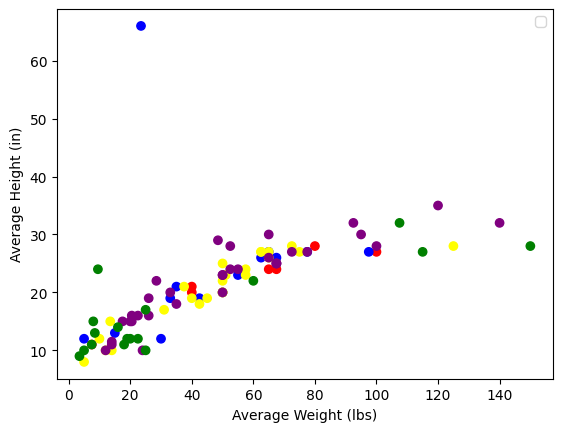

In [124]:
fig, ax = plt.subplots()
for classif in whole_info_obey['Classification'].unique():
    filt_data = whole_info_obey[whole_info_obey['Classification']==classif]
    ax.scatter(x=filt_data['avg_weight'], y=filt_data['avg_height'], c=filt_data['Classification'].map(color_dict))
ax.set_xlabel("Average Weight (lbs)")
ax.set_ylabel("Average Height (in)")
ax.legend()

plt.show()

Weight and height seem to have a positive correlation, which is expected, since a taller dog is expected to be overall bigger and weight more than a smaller one. All the categories seem spread over the plot, which leads to conclude that it is unlikely that the classification is correlated with the average dimensions of the breed.